For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``, which we can do using some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](03.00-Introduction-to-Pandas.ipynb):

# Excerise


For today we are going to try and train a machine learning classifier to identify penguin species from their physical measurements we've been looking at. 

Accuracy 95.0 %
Precision [ 87.5 100.  100. ] %
Recall [100.          77.27272727 100.        ] %


<AxesSubplot:xlabel='bill_depth_mm', ylabel='bill_length_mm'>

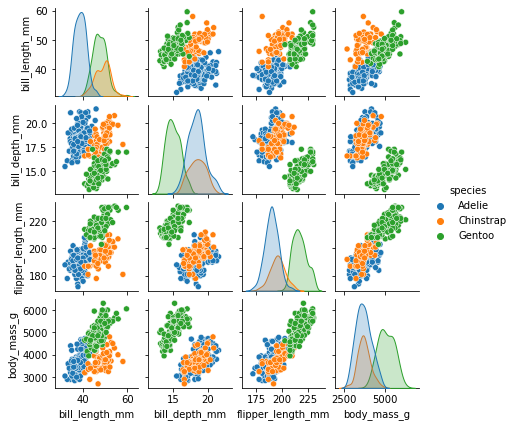

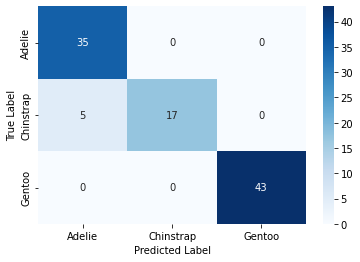

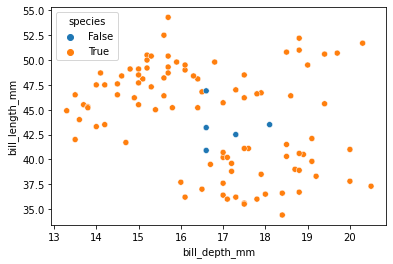

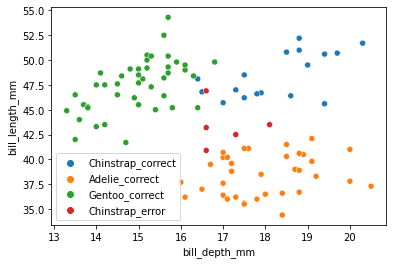

In [13]:
#Imports needed 

import seaborn as sns
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # 1. choose model class
import sklearn.metrics

penguins = sns.load_dataset("penguins")
penguins=penguins.dropna()

#Removing the target we want to classify
#Removing the  categorical features island and sex
X_penguins = penguins.drop(["species","island","sex"], axis=1) 
y_penguins = penguins["species"]


#Use sns.pairplot() to plot all data colored by species. 
sns.pairplot(data=penguins, hue='species', height=1.5); 


#First seperaate into testing and training sets:


#Randomly split the data into a training and test set.  
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=.3)



#Fit the naive bayes model 

model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

#  Check the accuracy of your model for classifying the left out testing data. 
accuracy = sklearn.metrics.accuracy_score(ytest, y_model)

# These are further metrics that are useful information
# These metrics give information about the accuracy within a class

#Precision is the positive predictive value.  
precision = sklearn.metrics.precision_score(ytest, y_model,average=None)
#Recall is the sensitivity.  The ability of the classifier to find all samples
recall = sklearn.metrics.recall_score(ytest, y_model,average=None)


print( "Accuracy {} %".format(100*accuracy))
print( "Precision {} %".format(100*precision))
print( "Recall {} %".format(100*recall))

# Make a confusion matrix plot to show the classification accuracy




cm = confusion_matrix(ytest, y_model)

#Using Seaborn
plt.figure()
categories = model.classes_
ax=sns.heatmap(cm, annot=True,xticklabels=categories,yticklabels=categories, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Make a scatter plot of 2 features and label the errors. 

plt.figure()

feature1 = 'bill_depth_mm'
feature2 = 'bill_length_mm'
#Simple boolean label correct -> True
correctly_labeled = y_model == ytest

#make a scatter plot showing correct and incorrect labels. 
sns.scatterplot(data=Xtest,x=feature1,y=feature2,hue=correctly_labeled)


#Make a more colorfol labeling scheme
plt.figure()

number_test = y_model.shape[0]

#initilize and empty list to hold the labels. 
error_label = []

#Loop through all the labels
for test_idx in range(number_test):
    
    #Check to see if the model prediction label matches the true label from the test
    #note the ytest is a pandas series.  So we need to use iloc to access the right row
    if y_model[test_idx] == ytest.iloc[test_idx]:
        #If the label was correct make the label the correct species         
        error_label.append(ytest.iloc[test_idx]+"_correct")
    else:
        #Otherwise if not correct it must be an error, 
        #Use the true species as the label plus adding error
        error_label.append(ytest.iloc[test_idx]+"_error")

#Now use the labeling scheme to mame the plot. 
sns.scatterplot(data=Xtest,x=feature1,y=feature2,hue=error_label)